In [2]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter

from pdbfixer import PDBFixer
from openmm.app import PDBFile

settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = True
settings.RW_do_params = False
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "HOIPapo_test"


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5 already exists. Attempting t

In [3]:
# ### add code to read in sequence from CIF file instead of copying it manually

# cif_file = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/AF-Q96EP0-F1-model_v4.cif"

# sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
# sequence = ""
# seq_head_idx = 0
# with open(cif_file, 'r') as f:
#     lines = f.readlines()
#     for idx, line in enumerate(lines):
#         if sequence_header in line:
#             seq_head_idx = idx+1
#             break
    
#     for idx, line in enumerate(lines[seq_head_idx:]):
#         if idx > 0 and line[0] == ";":
#             break
#         sequence += line.strip()


# # print(sequence)



# # strip sequence of non letters
# sequence = ''.join([i for i in sequence if i.isalpha()])

# print(sequence)

# print("Sequence length: ", len(sequence))


# # convert sequence to FASTA format
# def write_fasta(sequence, header, file_name):
#     """
#     Writes a single-letter amino acid sequence to a FASTA file.
    
#     Parameters:
#     - sequence: A string containing the amino acid sequence.
#     - header: A string to be used as the header in the FASTA file.
#     - file_name: The name of the FASTA file to be created.
#     """
#     print(f"Writing sequence to {file_name}")
#     with open(file_name, 'w') as fasta_file:
#         # Write the header with the '>' symbol
#         fasta_file.write(f">{header}\n")
        
#         # Write the sequence in lines of 80 characters
#         for i in range(0, len(sequence), 80):
#             fasta_file.write(sequence[i:i+80] + "\n")


In [4]:

# fasta_path = os.path.join("raw_data", "HOIP", 'HOIP_apo.fasta')
# write_fasta(sequence, 'HOIPapo', fasta_path)



In [5]:
# raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_peptide.csv"
# raw_hdx = pd.read_csv(raw_hdx_path)
# raw_hdx.tail()

In [6]:
# # drop Unnamed: 0	

# raw_hdx = raw_hdx.drop(columns=['Unnamed: 0'])
# raw_hdx.head()


In [7]:
# # assign peptide number for each start and end residue using ngroup
# raw_hdx['peptide'] = raw_hdx.groupby(['Start','End']).ngroup()

# raw_hdx.head()

In [8]:

# times = [0, 0.5, 5.0]

# num_peptides = len(raw_hdx)//len(times)

# exposure = times * num_peptides

# raw_hdx['Exposure'] = exposure

# raw_hdx.head()

In [9]:
# raw_hdx['UptakeFraction'] = raw_hdx['Uptake'] / raw_hdx['MaxUptake']

# raw_hdx.head()

In [10]:
# # clamp UptakeFraction to 1
# raw_hdx['UptakeFraction'] = raw_hdx['UptakeFraction'].clip(upper=1)

In [11]:
# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(raw_hdx)



In [12]:

# # pivot exposure and uptake fraction
# grouped = raw_hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# # drop 
# grouped.head()


In [13]:

# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(grouped)

In [14]:
# # conver to HDXer format ie start, end, exposure_1, exposure_2 

# # change Start to ResStr and End to ResEnd
# hdx = grouped.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# # drop the exposure column
# hdx.columns.name = None

# print(hdx)


In [15]:

# hdx = hdx.round(5)
# hdx.to_csv(os.path.join("raw_data", "HOIP", 'HOIP_apo.dat'), sep=' ', index=False)


In [16]:
# segs = hdx[['ResStr', 'ResEnd']].drop_duplicates().sort_values(by=['ResStr', 'ResEnd']).reset_index(drop=True)


In [17]:

# # convert to list of tuples
# segs = [tuple(x) for x in segs.values]

# print(segs)


In [18]:


# # write list as new lines with space delimiter
# with open(os.path.join("raw_data", "HOIP", 'HOIP_APO_segs.txt'), 'w') as f:
#     for item in segs:
#         f.write("%s\n" % ' '.join(map(str, item)))

In [19]:
# ### at the moment PDB fixer is adding different number of hydrogens to different structures... Need to change the code to use PROPKA to get H states and apply to all strucutres
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/"
# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     continue
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



# top_path = os.path.join(H_sim_dir, pdb_list[0])
# pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

# print(top_path)
# print(pdb_paths)


# small_traj_name = top_path.replace(".pdb","_small.xtc")
# small_traj_path = os.path.join(H_sim_dir, small_traj_name)

# u = mda.Universe(top_path)
    
# with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
#     for ts in u.trajectory:
#         W.write(u.atoms)
#         W.write(u.atoms)
#         break


Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [20]:
def pre_process_main():
    # BPTI data
    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    sim_name = 'HOIP_apo_AF'
    os.listdir(BPTI_dir)

    segs_name = "HOIP_APO_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "HOIP_apo.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(H_sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)
        break
    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = "/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_protonated.pdb"
    # pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    # print(top_path)
    # print(pdb_paths)


    # small_traj_name = top_path.replace(".pdb","_small.xtc")
    # small_traj_path = os.path.join(sim_dir, small_traj_name)

    # u = mda.Universe(top_path)
        
    # with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    #     for ts in u.trajectory:
    #         W.write(u.atoms)
    #         W.write(u.atoms)
    #         break
    # # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_protonated.xtc"]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [21]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo.dat
['HOIPapo_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb', 'HOIPapo_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb', 'HOIPapo_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb', 'HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000.pdb', 'HOIPapo_unrelaxed_rank_004_alphafold2_ptm_model_5_seed_000.pdb']
['/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_protonated.xtc']


In [22]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [23]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [24]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [25]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [0.0, 0.5, 5.0]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

In [26]:

splits = ['r', 'xK', 'R3']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


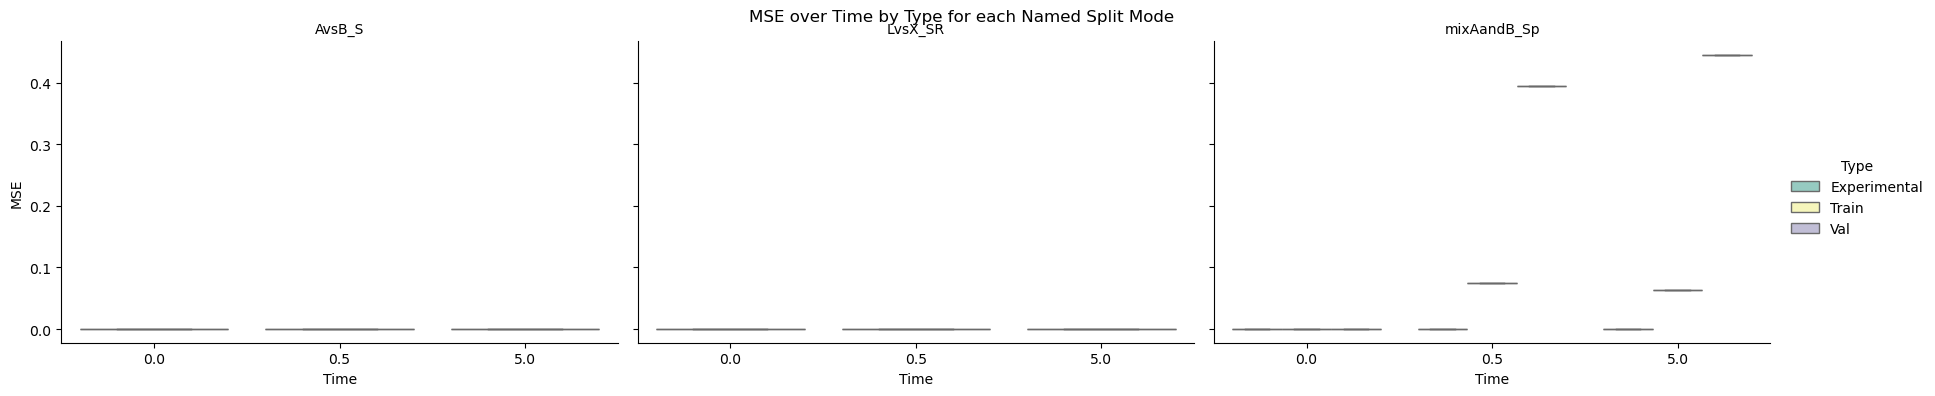

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

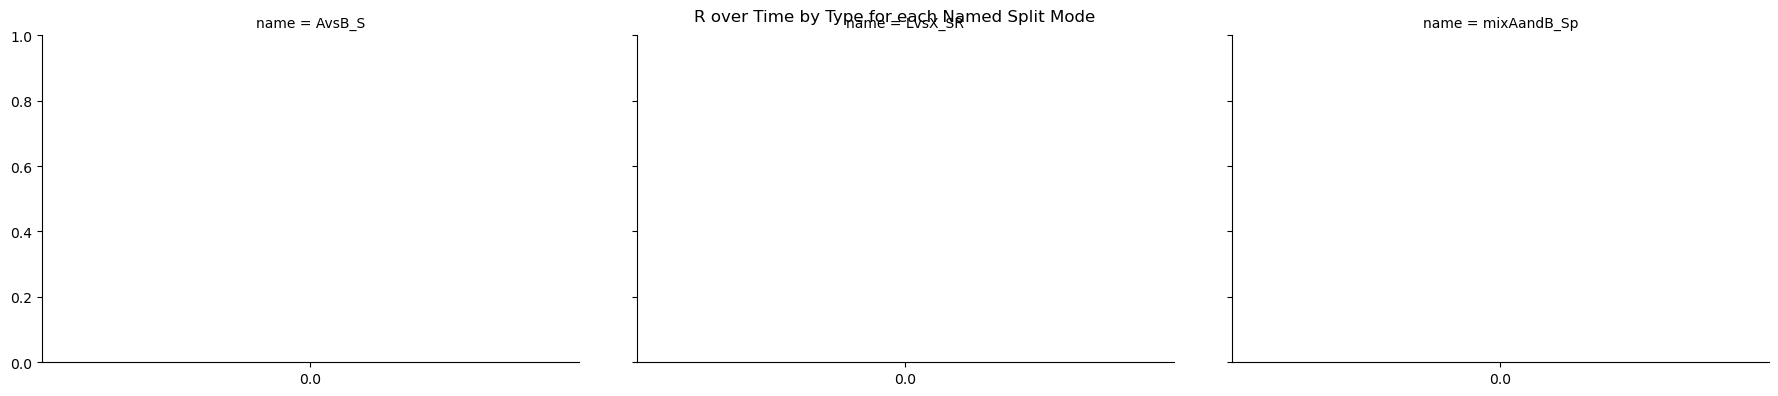

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                               LogPf  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1  [1.75, 4.55, 5.6, 4.8999999999999995, 9.7, 9.7...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1  [1.75, 4.55, 5.6, 4.8999999999999995, 9.7, 9.7...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
0  [9.734729536884675, 9.728149294701376, 9.74789...   
1  [1.75, 4.55, 5.6, 4.8999999999999995, 9.7, 9.7...   
2  [0.032901210916489634, 0.08554314838287304, 0....   
3  [0.032901210916489634, 0.08554314838287304, 0....   

                  calc_name  \
0      train_HOIPapo_test_1   
1  no_weight_HOIPapo_test_1   
2        val_HOIPapo_test_1   
3       test_HOIPapo_test_1   
0      train_HOIPapo_test_1   
1  no_weight_HOIPapo_test_1   
2        val_HOIPapo_test_1   
3       test_HOIPapo_te

ValueError: cannot reindex on an axis with duplicate labels

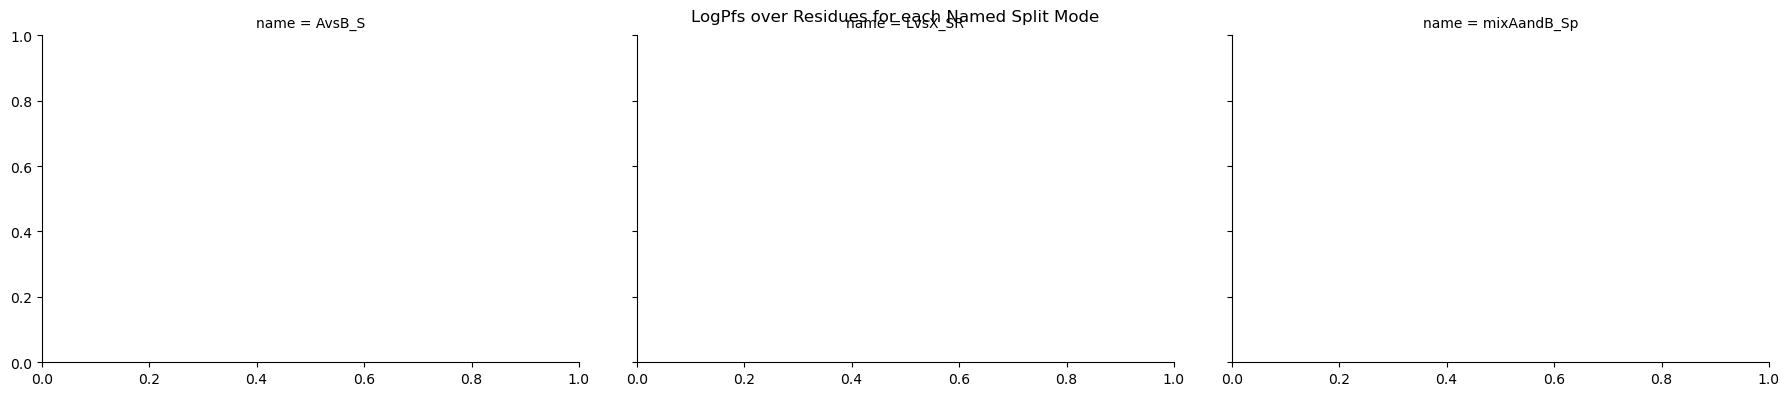

In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

